### JC const chain

In [1]:
import numpy as np
import ast
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
from quimb import *
from quimb.tensor import *
import sympy as sym

from joblib import Parallel, delayed
import pandas as pd
import time

import scipy as sp
from scipy import linalg
import pickle

from JC_functions import *

In [2]:
def make_MPS_const(dict_data):
    p, N = dict_data
    chi = max(int(2*np.sqrt(N)), 15)
    
    A_JC = MPS_JC_2site_const(chi,p)
    BL = np.zeros((2, chi, chi))
    BL[0,0,0] = 1

    MPS_list = [A_JC for i in range(N)]
    MPS_list.insert(0, BL)
    MPS_list.append(BL)

    JC_MPS = MatrixProductState(MPS_list, shape = 'plr')
    JC_MPS.cyclic = False
    JC_MPS.normalize()

    print(f'done with {dict_data}')

    return JC_MPS

def make_MPS(dict_data):
    theta, N = dict_data
    chi = max(int(2*np.sqrt(N)), 15)

    A_JC = MPS_JC_2site(chi,theta)
    BL = np.zeros((2, chi, chi))
    BL[0,0,0] = 1

    MPS_list = [A_JC for i in range(N)]
    MPS_list.insert(0, BL)
    MPS_list.append(BL)

    JC_MPS = MatrixProductState(MPS_list, shape = 'plr')
    JC_MPS.cyclic = False
    JC_MPS.normalize()

    print(f'done with {dict_data}')

    return JC_MPS

In [3]:
p, N, theta = [.5, 80, np.sqrt(np.pi)/3]

MPS_const = make_MPS_const([p,N])
MPS = make_MPS([theta,N])

done with [0.5, 80]
done with [0.5908179503018386, 80]


In [4]:
x_list = list(range(2,N, 3))
x_list.append(N)

In [5]:
SE_data_const = [MPS_const.entropy(x) for x in x_list]
SE_data = [MPS.entropy(x) for x in x_list]

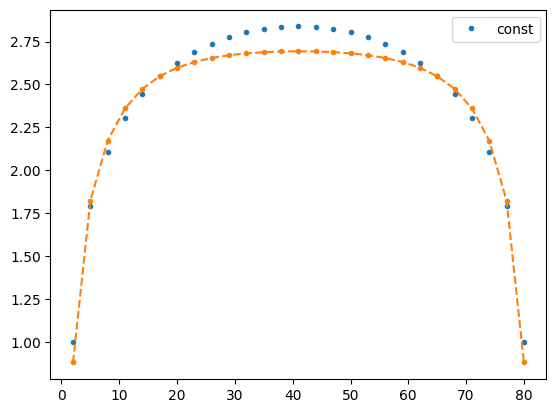

In [6]:
plt.plot(x_list,SE_data_const, '.', label = 'const')
plt.plot(x_list,SE_data, '.--')
plt.legend()

In [7]:
Z_A, Z_B = [np.kron(pauli('Z'), np.eye(2)), np.kron(np.eye(2),pauli('Z'))]
X_A, X_B = [np.kron(pauli('X'), np.eye(2)), np.kron(np.eye(2),pauli('X'))]

In [12]:
XX_data_const = [MPS_const.correlation(X_A - X_B, 1, x) for x in x_list]
XX_data = [MPS.correlation(X_A - X_B, 1, x) for x in x_list]

In [13]:
ZZ_data = [MPS.correlation(Z_A + Z_B, 1, x) for x in x_list]
ZZ_data_const = [MPS_const.correlation(Z_A + Z_B, 1, x) for x in x_list]

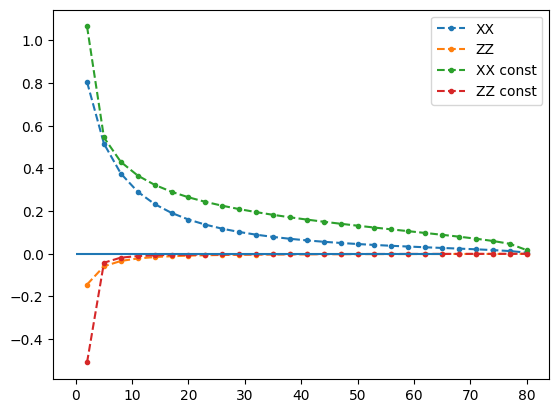

In [14]:
plt.plot(x_list,XX_data, '.--', label = 'XX')
plt.plot(x_list,ZZ_data, '.--', label = 'ZZ')

plt.plot(x_list,XX_data_const, '.--', label = 'XX const')
plt.plot(x_list,ZZ_data_const, '.--', label = 'ZZ const')

plt.hlines(0,0,65)
plt.legend()



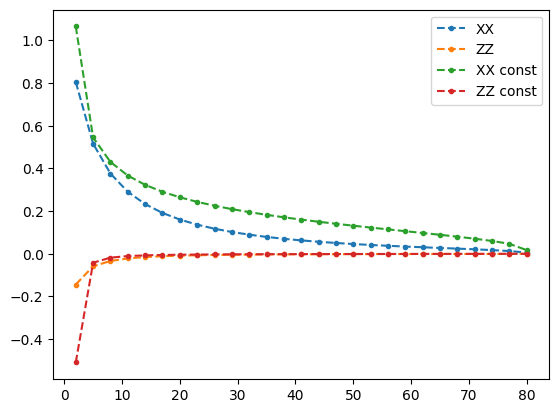

In [15]:
plt.plot(x_list,XX_data, '.--', label = 'XX')
plt.plot(x_list,ZZ_data, '.--', label = 'ZZ')

plt.plot(x_list,XX_data_const, '.--', label = 'XX const')
plt.plot(x_list,ZZ_data_const, '.--', label = 'ZZ const')

plt.legend()